#### Import packages

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # for encoding categorical labels
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#### Define the dataset

In [140]:
data = pd.read_csv('sentimentdataset.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data Exploring: Check for null values and data types.

In [141]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


## Data Processing

In [142]:
labelenc = LabelEncoder() #label encoder instance
df['Sentiment_encoded'] = labelenc.fit_transform(df['Sentiment'])

df['combined'] = df['Text'].astype(str) + " " + df['Hashtags'].astype(str)


vecto = TfidfVectorizer()
text_vec = vecto.fit_transform(df['combined'])

#create a mapping of original labels to encoded values
mapping = {label: int(idx) for idx, label in enumerate(labelenc.classes_)}
print("Label -> Encoded mapping:")
for label, idx in mapping.items():
    print(f"{label} -> {idx}")


Label -> Encoded mapping:
 Acceptance    -> 0
 Acceptance       -> 1
 Accomplishment  -> 2
 Admiration  -> 3
 Admiration    -> 4
 Admiration     -> 5
 Adoration     -> 6
 Adrenaline      -> 7
 Adventure  -> 8
 Affection     -> 9
 Amazement  -> 10
 Ambivalence  -> 11
 Ambivalence      -> 12
 Amusement     -> 13
 Amusement      -> 14
 Anger         -> 15
 Anticipation  -> 16
 Anticipation   -> 17
 Anxiety    -> 18
 Anxiety          -> 19
 Appreciation   -> 20
 Apprehensive  -> 21
 Arousal        -> 22
 ArtisticBurst  -> 23
 Awe  -> 24
 Awe     -> 25
 Awe           -> 26
 Awe            -> 27
 Bad  -> 28
 Betrayal  -> 29
 Betrayal       -> 30
 Bitter        -> 31
 Bitterness  -> 32
 Bittersweet  -> 33
 Blessed        -> 34
 Boredom  -> 35
 Boredom          -> 36
 Breakthrough  -> 37
 Calmness      -> 38
 Calmness       -> 39
 Captivation  -> 40
 Celebration  -> 41
 Celestial Wonder  -> 42
 Challenge  -> 43
 Charm  -> 44
 Colorful  -> 45
 Compassion -> 46
 Compassion     -> 47
 Compassiona

## Summary Statistics and Hypothesis Testing

#### Distribution of sentiment in the data set.
Show how frequent each sentiment is.

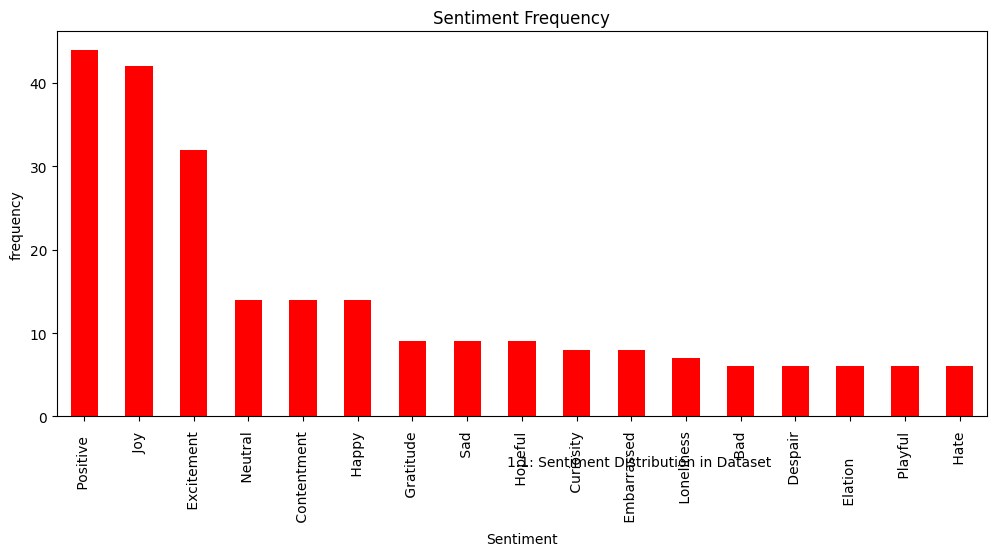

In [ ]:
filtered = df['Sentiment'].value_counts()[df['Sentiment'].value_counts() > 5]
filtered.plot(kind='bar', ylabel="frequency", title="Sentiment Frequency", figsize=(12,5), color='red')
plt.show()

** H0 : There is no difference in average engagement between positive and negative tweets **

** H1 : There is a difference in average engagement between positive and negative tweets **

Welch t-test: t=9.346, p=0.0000


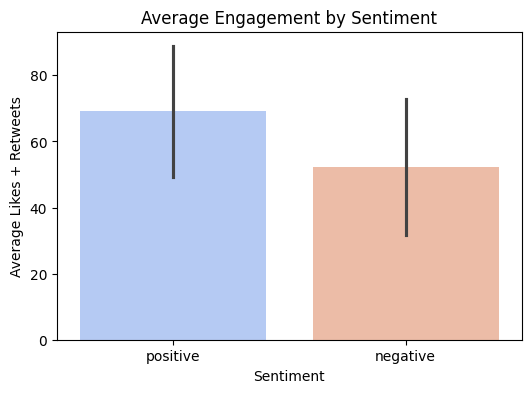

In [144]:
## comparing engagement based on sentiment

# getting engagement count
engagement = []
for retweet, like in zip(df['Retweets'],  df['Likes']):
    total = like + retweet
    engagement.append(total)

df['Engagement'] = engagement
df


## normalize the labels
df['Sentiment_norm'] = df['Sentiment'].astype(str).str.strip().str.lower()

## put each sentiment into buckets

pos = {
    'positive','happiness','joy','love','amusement','enjoyment','admiration',
    'affection','awe','surprise','acceptance','adoration','anticipation',
    'kind','pride','excitement','optimistic','gratitude'
}

neg = {
    'negative','anger','fear','sadness','disgust','disappointed','bitter',
    'shame'
}

neu = {'neutral', 'confusion','acceptance','calmness'}

sentiment_map = {}
sentiment_map.update({k:'positive' for k in pos})
sentiment_map.update({k:'negative' for k in neg})
sentiment_map.update({k:'netrual' for k in neu})

df['Polarity'] = df['Sentiment_norm'].map(sentiment_map)

## for sentiments that are not mapped, use vader on the text
sia = SentimentIntensityAnalyzer()
def vader_bucket(text):
    c = sia.polarity_scores(str(text))['compound']
    return 'positive' if c > 0.05 else ('negative' if c < -0.05 else 'neutral')

df.loc[df['Polarity'].isna(), 'Polarity'] = df.loc[df['Polarity'].isna(), 'Text'].apply(vader_bucket)

## keep groups with atleast 5 tweets
counts = df['Polarity'].value_counts()
keep = counts[counts >=  5].index
df_f = df[df['Polarity'].isin(keep)]

## compare the means

pos_eng = df_f.loc[df_f['Polarity'] == 'positive', 'Engagement']
neg_eng = df_f.loc[df_f['Polarity'] == 'negative', 'Engagement']

t_stat, p_val = ttest_ind(pos_eng, neg_eng, equal_var=False)

print("Welch t-test: t=%.3f, p=%.4f" % (t_stat, p_val))

df_subset = df_f[df_f['Polarity'].isin(['positive', 'negative'])]

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_subset,
    x='Polarity',
    y='Engagement',
    hue='Polarity',
    legend=False,
    errorbar='sd',
    palette='coolwarm'
)
plt.title('Average Engagement by Sentiment')
plt.ylabel('Average Likes + Retweets')
plt.xlabel('Sentiment')
plt.show()    

Becaue the p value is < 0.05, I can reject the null hypothesis that there is no difference in engagement between positive and negative tweets


In [145]:
sentiment_scores = {
    'Acceptance': 1, 'Accomplishment': 1, 'Admiration': 1, 'Adoration': 1, 'Adrenaline': 1,
    'Adventure': 1, 'Affection': 1, 'Amazement': 1, 'Ambivalence': 0, 'Amusement': 1,
    'Anger': -1, 'Anticipation': 1, 'Anxiety': -1, 'Appreciation': 1, 'Apprehensive': -1,
    'Arousal': 0, 'ArtisticBurst': 1, 'Awe': 1, 'Bad': -1, 'Betrayal': -1, 'Bitter': -1,
    'Bitterness': -1, 'Bittersweet': 0, 'Blessed': 1, 'Boredom': -1, 'Breakthrough': 1,
    'Calmness': 1, 'Captivation': 1, 'Celebration': 1, 'Celestial Wonder': 1, 'Challenge': 0,
    'Charm': 1, 'Colorful': 1, 'Compassion': 1, 'Compassionate': 1, 'Confidence': 1,
    'Confident': 1, 'Confusion': 0, 'Connection': 1, 'Contemplation': 0, 'Contentment': 1,
    'Coziness': 1, 'Creative Inspiration': 1, 'Creativity': 1, 'Culinary Adventure': 1,
    'CulinaryOdyssey': 1, 'Curiosity': 1, 'Darkness': -1, 'Dazzle': 1, 'Desolation': -1,
    'Despair': -1, 'Desperation': -1, 'Determination': 1, 'Devastated': -1,
    'Disappointed': -1, 'Disappointment': -1, 'Disgust': -1, 'Dismissive': -1,
    'DreamChaser': 1, 'Ecstasy': 1, 'Elation': 1, 'Elegance': 1, 'Embarrassed': -1,
    'Emotion': 0, 'EmotionalStorm': -1, 'Empathetic': 1, 'Empowerment': 1, 'Enchantment': 1,
    'Energy': 1, 'Engagement': 1, 'Enjoyment': 1, 'Enthusiasm': 1, 'Envious': -1,
    'Envisioning History': 0, 'Envy': -1, 'Euphoria': 1, 'Excitement': 1, 'Exhaustion': -1,
    'Exploration': 1, 'Fear': -1, 'Fearful': -1, 'FestiveJoy': 1, 'Free-spirited': 1,
    'Freedom': 1, 'Friendship': 1, 'Frustrated': -1, 'Frustration': -1, 'Fulfillment': 1,
    'Grandeur': 1, 'Grateful': 1, 'Gratitude': 1, 'Grief': -1, 'Happiness': 1, 'Happy': 1,
    'Harmony': 1, 'Hate': -1, 'Heartache': -1, 'Heartbreak': -1, 'Heartwarming': 1,
    'Helplessness': -1, 'Hope': 1, 'Hopeful': 1, 'Hypnotic': 0, 'Iconic': 1, 'Imagination': 1,
    'Immersion': 0, 'Indifference': 0, 'InnerJourney': 1, 'Inspiration': 1, 'Inspired': 1,
    'Intimidation': -1, 'Intrigue': 1, 'Isolation': -1, 'Jealous': -1, 'Jealousy': -1,
    'Journey': 1, 'Joy': 1, 'Joy in Baking': 1, 'JoyfulReunion': 1, 'Kind': 1, 'Kindness': 1,
    'Loneliness': -1, 'Loss': -1, 'LostLove': -1, 'Love': 1, 'Marvel': 1, 'Melancholy': -1,
    'Melodic': 1, 'Mesmerizing': 1, 'Mindfulness': 1, 'Miscalculation': -1, 'Mischievous': 0,
    'Motivation': 1, "Nature's Beauty": 1, 'Negative': -1, 'Neutral': 0, 'Nostalgia': 0,
    'Numbness': 0, 'Obstacle': 0, "Ocean's Freedom": 1, 'Optimism': 1, 'Overjoyed': 1,
    'Overwhelmed': -1, 'Pensive': 0, 'Playful': 1, 'PlayfulJoy': 1, 'Positive': 1,
    'Positivity': 1, 'Pressure': -1, 'Pride': 1, 'Proud': 1, 'Radiance': 1, 'Reflection': 0,
    'Regret': -1, 'Rejuvenation': 1, 'Relief': 1, 'Renewed Effort': 1, 'Resentment': -1,
    'Resilience': 1, 'Reverence': 1, 'Romance': 1, 'Ruins': -1, 'Runway Creativity': 1,
    'Sad': -1, 'Sadness': -1, 'Satisfaction': 1, 'Serenity': 1, 'Shame': -1, 'Solace': 1,
    'Solitude': 0, 'Sorrow': -1, 'Spark': 1, 'Success': 1, 'Suffering': -1, 'Surprise': 0,
    'Suspense': 0, 'Sympathy': 1, 'Tenderness': 1, 'Thrill': 1, 'Thrilling Journey': 1,
    'Touched': 1, 'Tranquility': 1, 'Triumph': 1, 'Vibrancy': 1, 'Whimsy': 1,
    'Whispers of the Past': 0, 'Winter Magic': 1, 'Wonder': 1, 'Wonderment': 1, 'Yearning': 0,
    'Zest': 1
}

Gives each Sentiment a score of either -1 (Negative), 0 (Neutral), or 1(Positive) based on the emotion.

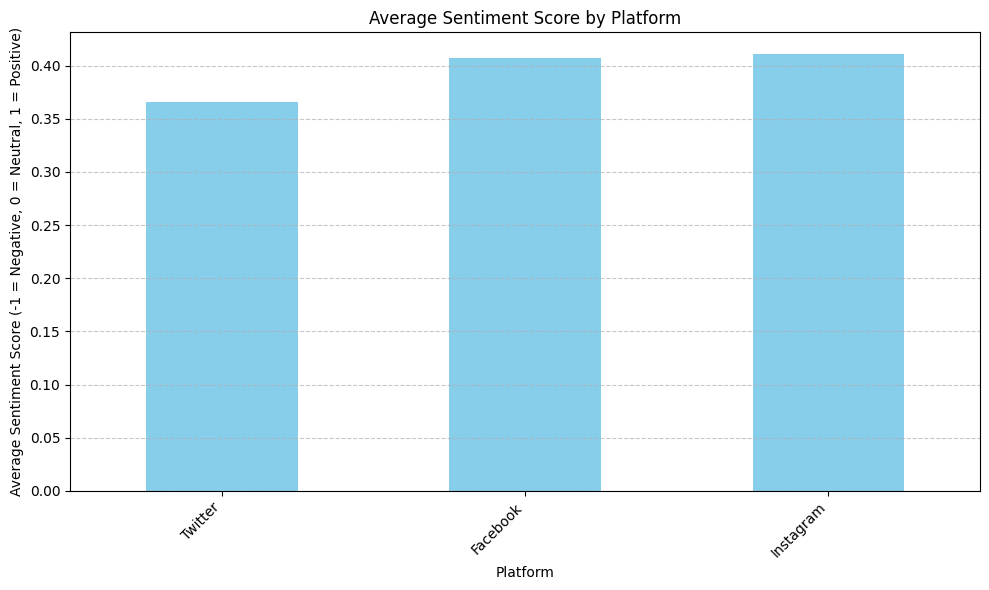

In [146]:


#Clean sentiment column
df['Platform'] = df['Platform'].str.strip().str.capitalize()
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_scores)

#Calculates the average sentiment scores per platform
avg_scores = df.groupby('Platform')['Sentiment_Score'].mean().sort_values()

#Creates bar plot
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sentiment Score (-1 = Negative, 0 = Neutral, 1 = Positive)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



** H0 : The mean sentiment score is the same across all platforms. **

** H1 : At least one platform has a different mean sentiment score. **

In [147]:
df = pd.read_csv("sentimentdataset.csv")

df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()
df['Platform'] = df['Platform'].astype(str).str.strip().str.title()

# Map to numeric sentiment scores
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['Sentiment'] = df['Sentiment'].replace(sentiment_mapping)

# Drop rows with missing or invalid values
df = df.dropna(subset=['Sentiment', 'Platform'])
df = df[df['Sentiment'].isin([-1, 0, 1])]

# Check counts per platform
print("Platforms and counts:")
print(df['Platform'].value_counts(), "\n")

# Group data for ANOVA
groups = [group['Sentiment'].values for _, group in df.groupby('Platform') if len(group) > 1]

# Run one-way ANOVA
if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)
    print("ANOVA Results:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.6f}")

    if p_value < 0.05:
        print("→ Reject the null hypothesis: At least one platform has a significantly different mean sentiment.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in mean sentiment across platforms.")
else:
    print("Not enough valid groups for ANOVA.")


Platforms and counts:
Platform
Instagram    23
Twitter      22
Facebook     22
Name: count, dtype: int64 

ANOVA Results:
F-statistic: 1.2153
P-value: 0.303363
Fail to reject the null hypothesis: No significant difference in mean sentiment across platforms.
